## Import dependencies

In [24]:
import pandas as pd
import numpy as np
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import matplotlib

## Load data

In [25]:
dataset = pd.read_csv('dataset/train.csv')
dataset.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Feature selection and data cleaning

In [26]:
new_features = ['Age', 'Pclass', 'Sex', 'Fare']
target_var = ['Survived']
df_x = dataset[new_features]
df_y = dataset[target_var]

print(df_x.isnull().sum())

df_x['Age'][df_x['Age'].isnull()] = df_x['Age'].median()

map_to_int={'male' : 0, 'female' : 1}
df_x['Sex']=df_x['Sex'].apply(lambda x:map_to_int[x])

print(df_x.isnull().sum())

Age       177
Pclass      0
Sex         0
Fare        0
dtype: int64
Age       0
Pclass    0
Sex       0
Fare      0
dtype: int64


/home/sayan/.local/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/home/sayan/.local/lib/python3.6/site-packages/pandas/core/generic.py:9114: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)
/home/sayan/.local/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3326: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exec(code_obj, self.user_global_ns, se

## Train the model

In [27]:
model = svm.LinearSVC()

x_train, x_test, y_train, y_test = train_test_split(df_x, df_y, test_size = 0.25, random_state = 55)

model.fit(x_train, y_train)
y_predict = model.predict(x_test)

/home/sayan/.local/lib/python3.6/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/sayan/.local/lib/python3.6/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


## Data visualization

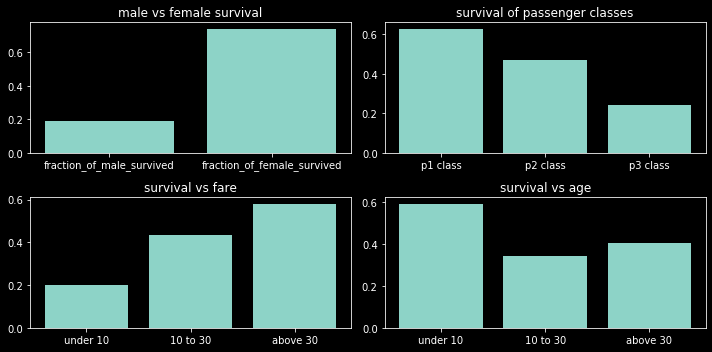

In [28]:
%matplotlib inline
plt.rcParams['figure.figsize'] = [10, 5]
plt.style.use('dark_background')
matplotlib.rcParams.update({'font.size': 10})

plt.subplot(2,2,1)
plt.title('male vs female survival')
fraction_of_male_survived = np.sum(df_x['Sex'][df_y['Survived']==1]==0)/np.sum(df_x['Sex']==0)
fraction_of_female_survived = np.sum(df_x['Sex'][df_y['Survived']==1]==1)/np.sum(df_x['Sex']==1)
plt.bar(["fraction_of_male_survived", "fraction_of_female_survived"], [fraction_of_male_survived, fraction_of_female_survived])
plt.tight_layout()

plt.subplot(2,2,2)
plt.title('survival of passenger classes')
p1class_survival = np.sum(df_x['Pclass'][df_y['Survived']==1]==1)/np.sum(df_x['Pclass']==1)
p2class_survival = np.sum(df_x['Pclass'][df_y['Survived']==1]==2)/np.sum(df_x['Pclass']==2)
p3class_survival = np.sum(df_x['Pclass'][df_y['Survived']==1]==3)/np.sum(df_x['Pclass']==3)
plt.bar(["p1 class", "p2 class", "p3 class"], [p1class_survival, p2class_survival, p3class_survival])
plt.tight_layout()

plt.subplot(2,2,3)
plt.title('survival vs fare')
under_10 = np.sum(df_x['Fare'][df_y['Survived']==1] <= 10)/np.sum(df_x['Fare']<= 10)
_10_to_30 = ((df_x['Fare'][df_y['Survived']==1] <= 30) & (df_x['Fare'][df_y['Survived']==1] > 10)).sum()/((df_x['Fare'] > 10) & (df_x['Fare'] <= 30)).sum()
above_30 = np.sum(df_x['Fare'][df_y['Survived']==1] > 30)/np.sum(df_x['Fare']> 30) 
plt.bar(["under 10", "10 to 30", "above 30"], [under_10, _10_to_30, above_30])
plt.tight_layout()

plt.subplot(2,2,4)
plt.title('survival vs age')
under_10 = np.sum(df_x['Age'][df_y['Survived']==1] <= 10)/np.sum(df_x['Age']<= 10)
_10_to_30 = ((df_x['Age'][df_y['Survived']==1] <= 30) & (df_x['Age'][df_y['Survived']==1] > 10)).sum()/((df_x['Age'] > 10) & (df_x['Age'] <= 30)).sum()
above_30 = np.sum(df_x['Age'][df_y['Survived']==1] > 30)/np.sum(df_x['Age']> 30) 
plt.bar(["under 10", "10 to 30", "above 30"], [under_10, _10_to_30, above_30])
plt.tight_layout()

## Evaluation

In [ ]:
print("model score: ", model.score(x_test, y_test))
print(classification_report(y_test, y_predict))